In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

## Import Dataset

In [2]:
df_pen = sns.load_dataset('penguins')
df_pen = df_pen.dropna()

In [3]:
df_pen = df_pen.sample(frac=1).reset_index(drop=True)

In [4]:
X = df_pen.drop(['island'], axis = 1)
y = df_pen['island']

## Data Pre-processing

In [5]:
X = pd.get_dummies(X, drop_first=True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=45)

In [7]:
escalador = StandardScaler()
escalador.fit(X_train)

X_train = escalador.transform(X_train)
X_test = escalador.transform(X_test)

## Model implementation

In [8]:
from sklearn.svm import SVC # Supprt Vector Classifier

In [9]:
svc_model = SVC()

In [10]:
svc_model.fit(X_train,y_train)

SVC()

### Evaluation

In [11]:
y_pred = svc_model.predict(X_test)

In [12]:
metrics.accuracy_score(y_test,y_pred)

0.6567164179104478

In [13]:
metrics.confusion_matrix(y_test,y_pred)

array([[22, 11,  0],
       [ 0, 22,  0],
       [ 0, 12,  0]], dtype=int64)

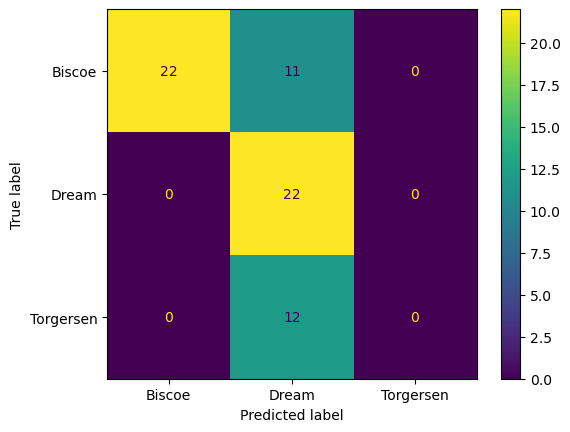

In [14]:
cm = metrics.confusion_matrix(y_test,y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=svc_model.classes_).plot()

In [15]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Biscoe       1.00      0.67      0.80        33
       Dream       0.49      1.00      0.66        22
   Torgersen       0.00      0.00      0.00        12

    accuracy                           0.66        67
   macro avg       0.50      0.56      0.49        67
weighted avg       0.65      0.66      0.61        67



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Grid Search

In [16]:
svc_model = SVC()

In [17]:
parametros = {'C':[0.01,0.1,1, 10],'kernel':['linear','rbf']}

In [18]:
grid_model = GridSearchCV(svc_model,param_grid= parametros, cv = 5, scoring='accuracy', n_jobs=-1)

In [19]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [20]:
grid_model.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [21]:
y_pred = grid_model.predict(X_test)

In [22]:
metrics.accuracy_score(y_test,y_pred)

0.6567164179104478

In [23]:
metrics.confusion_matrix(y_test,y_pred)

array([[22, 11,  0],
       [ 0, 22,  0],
       [ 0, 12,  0]], dtype=int64)

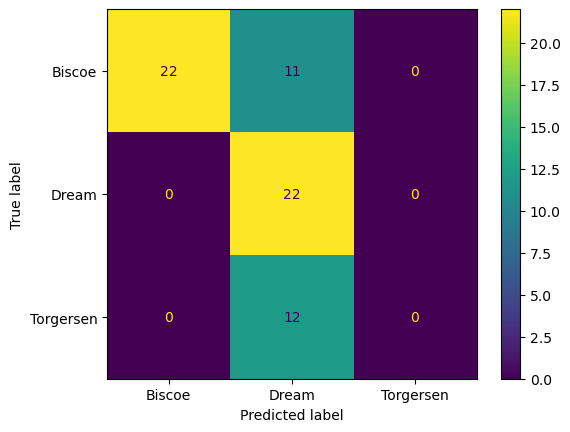

In [24]:
cm = metrics.confusion_matrix(y_test,y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=grid_model.classes_).plot()

In [25]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Biscoe       1.00      0.67      0.80        33
       Dream       0.49      1.00      0.66        22
   Torgersen       0.00      0.00      0.00        12

    accuracy                           0.66        67
   macro avg       0.50      0.56      0.49        67
weighted avg       0.65      0.66      0.61        67



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
